In [ ]:
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


data = pd.read_csv('correlated.csv')
if data.isnull().values.any():
    print('Warning: input data contains missing values')
    data = data.dropna()  # Drop rows with missing values

#Log scale the data into different classes    
lg = LogisticRegression()
data['Likes'] = data['Likes'].fillna(1)
data['Likes'] = data['Likes'].replace(to_replace=0, value=1)
data['Likes'] = np.log10(data['Likes'])
data = data.astype({'Likes':'int'})
data['Likes'] = data['Likes'].astype('category')
y = data['Likes']

#Standardize and create split
x = data.drop(columns=['Likes'])
sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Basic logistic regression
lg.fit(x_train, y_train)
preds = lg.predict(x_test)
accuracy_score(y_test, preds)


<ipython-input-106-a8fcffb2d907>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Likes'] = data['Likes'].fillna(1)
<ipython-input-106-a8fcffb2d907>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Likes'] = data['Likes'].replace(to_replace=0, value=1)
<ipython-input-106-a8fcffb2d907>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

0.7120204603580562

Epoch 1/100
489/489 [==============================] - 2s 2ms/step - loss: 1.7399 - accuracy: 0.3880
Epoch 2/100
489/489 [==============================] - 1s 3ms/step - loss: 1.3125 - accuracy: 0.5186
Epoch 3/100
489/489 [==============================] - 2s 5ms/step - loss: 1.1520 - accuracy: 0.5821
Epoch 4/100
489/489 [==============================] - 1s 2ms/step - loss: 1.0471 - accuracy: 0.6234
Epoch 5/100
489/489 [==============================] - 1s 2ms/step - loss: 0.9681 - accuracy: 0.6555
Epoch 6/100
489/489 [==============================] - 1s 2ms/step - loss: 0.9087 - accuracy: 0.6724
Epoch 7/100
489/489 [==============================] - 1s 3ms/step - loss: 0.8611 - accuracy: 0.6891
Epoch 8/100
489/489 [==============================] - 1s 2ms/step - loss: 0.8226 - accuracy: 0.6984
Epoch 9/100
489/489 [==============================] - 1s 3ms/step - loss: 0.7917 - accuracy: 0.7057
Epoch 10/100
489/489 [==============================] - 2s 4ms/step - loss: 0.7667 - accura

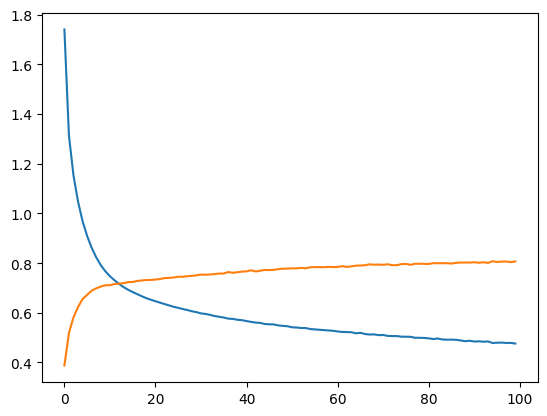

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

#Onehot encode classes
y = data['Likes']
ohe = OneHotEncoder()
y = ohe.fit_transform(y.values.reshape(-1,1)).toarray()

#generate split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#create and predict with NN
model = Sequential()
model.add(Dense(10, input_dim=14, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=32)
n_pred = model.predict(x_test)

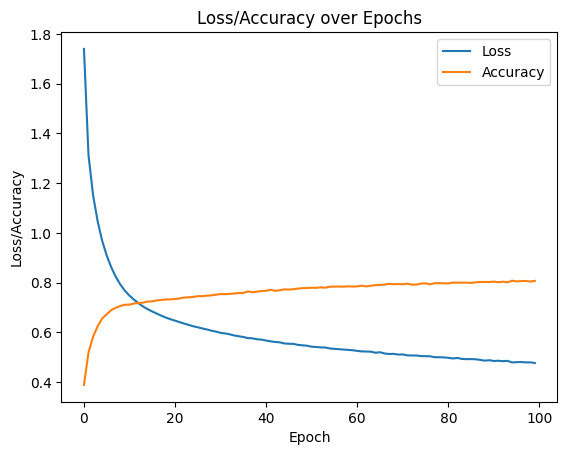

In [ ]:
#plot with loss and accuracy for NN
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Loss/Accuracy over Epochs')
plt.show()

In [ ]:
#Get list of class assignments for test and prediction
pred = list()
for i in range(len(n_pred)):
    pred.append(np.argmax(n_pred[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))


a = accuracy_score(pred,test)
print(a)
#0.8066496163682865

0.8038363171355499


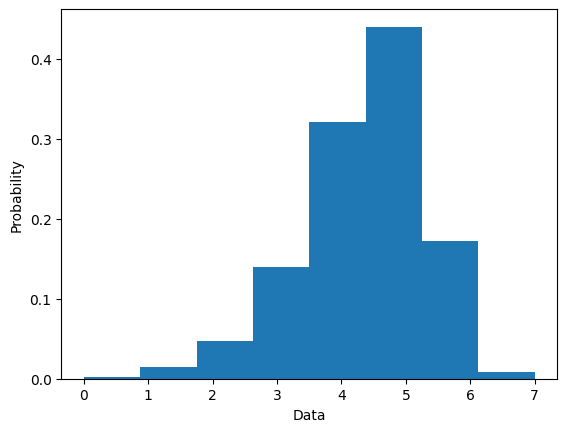

In [ ]:
#check histogram of data
plt.hist(y, density=True, bins=8) 
plt.ylabel('Probability')
plt.xlabel('Data')
h, b = np.histogram(y, bins=8, density=True)

In [ ]:
!pip install pytube
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 6.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pytube import YouTube
import ffmpeg
import pandas as pd
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import wave
import sys
import numpy as np


df = pd.read_csv('Spotify_Youtube.csv')
binned = pd.read_csv('grouped_data.csv')

#Log scale data
df = df[df['Likes'] >= 10000]
df['Likes'] = df['Likes'].fillna(1)
df['Likes'] = df['Likes'].replace(to_replace=0, value=1)
df['Likes'] = np.log10(df['Likes'])
df = df.astype({'Likes':'int'})
df['Likes'] = df['Likes'].astype('category')

#Get subset of the data
url = df[['Url_youtube','Likes']]
num_samples = 20
sam = url.sample(n=num_samples)

display(sam)

#download raw audio from youtube links of sampled rows
num = 0 
for index, row in sam.iterrows():
    yt = YouTube(row['Url_youtube'], use_oauth=True, allow_oauth_cache=True)
    stream_url = yt.streams[0].url
    audio, err = (
        ffmpeg
        .input(stream_url)
        .output("pipe:", format='wav', acodec='pcm_s16le')  # Select WAV output format, and pcm_s16le auidio codec. My add ar=sample_rate
        .run(capture_stdout=True))
    with open(f'audio{num:02}.wav', 'wb') as f:
        f.write(audio)
        f.close()
        num += 1

print('finished')

,Url_youtube,Likes
10687,https://www.youtube.com/watch?v=A9hcJgtnm6Q,6
14016,https://www.youtube.com/watch?v=uMTYOaLLycs,5
5401,https://www.youtube.com/watch?v=FHo5uhYhjHE,4
4877,https://www.youtube.com/watch?v=Gw7gNf_9njs,5
7473,https://www.youtube.com/watch?v=Ek-2VWEvQkQ,5
1169,https://www.youtube.com/watch?v=SlgtjRq5AXs,6
18570,https://www.youtube.com/watch?v=5GJWxDKyk3A,6
4632,https://www.youtube.com/watch?v=aSkFygPCTwE,5
3677,https://www.youtube.com/watch?v=Epj84QVw2rc,5
12404,https://www.youtube.com/watch?v=D50eYCuEzaQ,4


finished


In [ ]:
import librosa
import librosa.display
import sklearn.preprocessing as skl

#normalize data
def normalize(x, axis=0):
    return skl.minmax_scale(x, axis=axis)

#generate time axis 
def timescale(x, sr):
    frames = range(len(x))
    t = librosa.frames_to_time(frames, sr=sr)
    return t

#generate np array out of wav file
def to_array(filename, sr):
    y, rate = librosa.load(filename, sr=sr)
    return y

#plot amplitude graph
def display_amp(x, sr):
    plt.figure()
    librosa.display.waveshow(x, sr=sr)

#plot spectrogram 
def display_spec(x, sr):
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure()
    plt.title('Spec')
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

#plot and return melfrequency spectrogram
def mel_spec(x, sr, plot):
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=50)    
    mfccsscaled = np.mean(mfccs,axis=0)
    print(mfccsscaled.shape)
    if plot:
        plt.figure()
        plt.title('Mel Spec')
        librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='hz')
        plt.colorbar()
    return mfccsscaled

#plot and return mel spectrogram   
def mels_2(x, sr, plot):
  S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=20)
  log_S = librosa.amplitude_to_db(abs(S))
  
  if plot:
    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.title('mel power spectrogram')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
  return S

#plot and return zero crossings
def get_zeroes(x, plot):
    zcrs = librosa.feature.zero_crossing_rate(x)
    if plot:
        plt.figure()
        plt.plot(zcrs[0])
    return zcrs

#plot and return spectral centroid
def spec_cent(x, sr, plot):
    spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
    if plot:
        t = timescale(spectral_centroids, 44100)
        s = normalize(spectral_centroids)
        plt.figure()
        librosa.display.waveshow(x, sr=sr, alpha=0.4)
        plt.plot(t, s, color='r')
    return s

#plot and return spectral bandwidth
def spec_band(x, sr, plot):
    bw2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
    bw3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
    bw4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
    if plot:
        spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
        t = timescale(spectral_centroids, 44100)
        plt.figure()
        librosa.display.waveshow(x, sr=sr, alpha=0.4)
        plt.plot(t, normalize(bw2), color='r')
        plt.plot(t, normalize(bw3), color='g')
        plt.plot(t, normalize(bw4), color='y')
        plt.legend(('p = 2', 'p = 3', 'p = 4'))
    return bw2, bw3, bw4

#plot and return spectral rolloff
def spec_roll(x, sr, plot):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
    if plot:
        spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
        t = timescale(spectral_centroids, 44100)
        plt.figure()
        librosa.display.waveshow(x, sr=sr, alpha=0.4)
        plt.plot(t, normalize(spectral_rolloff), color='r')
    return spectral_rolloff

#plot and return chroma
def chroma(x, sr, plot):
    chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=512)
    if plot:
        plt.figure()
        librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
    return chromagram

#plot and return pitches/magnitudes
def pitch(x, sr):
    pitches, magnitudes = librosa.piptrack(y=x, sr=sr)
    return pitches, magnitudes

display(data)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Stream,Comments,Likes
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,1.040235e+09,169907.0,6
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,3.100837e+08,31003.0,6
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,6.306347e+07,7399.0,5
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,4.346636e+08,55229.0,6
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6.172597e+08,155930.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,9.227144e+06,0.0,3
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,1.089818e+07,0.0,3
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,6.226110e+06,0.0,2
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,6.873961e+06,0.0,1


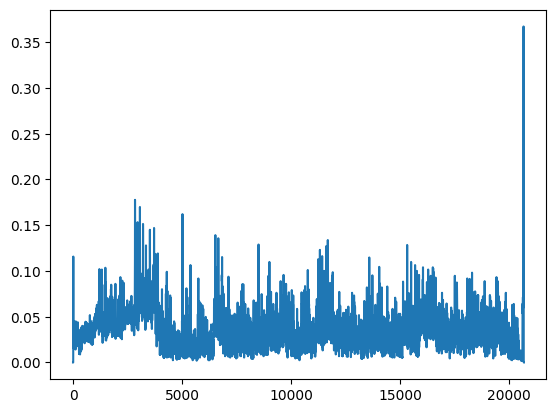

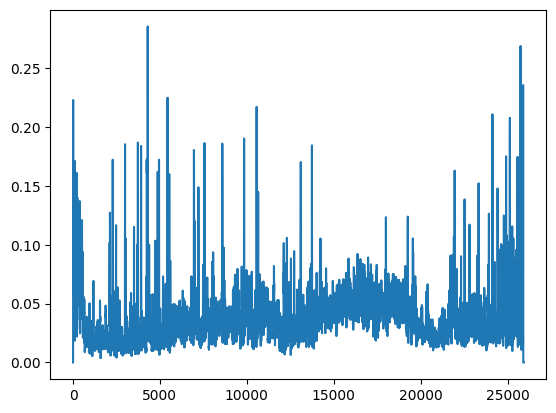

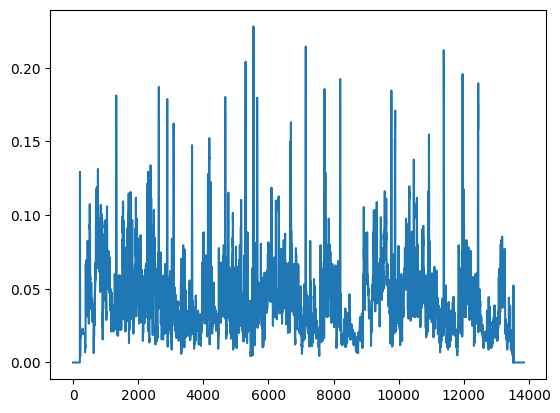

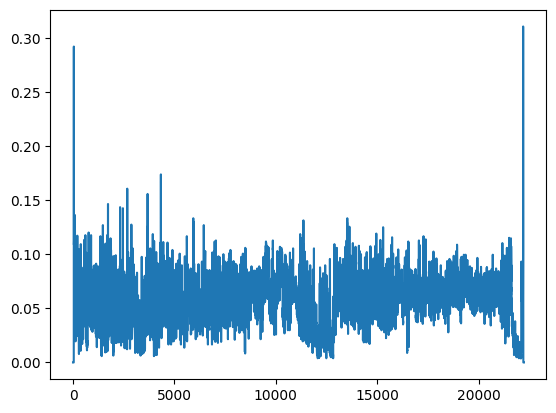

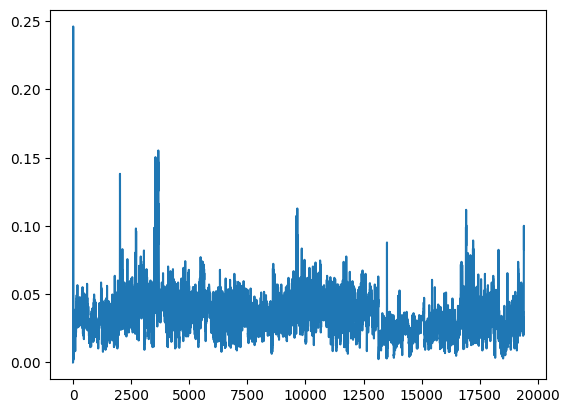

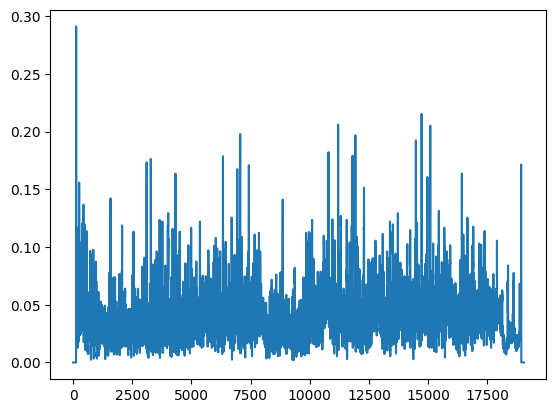

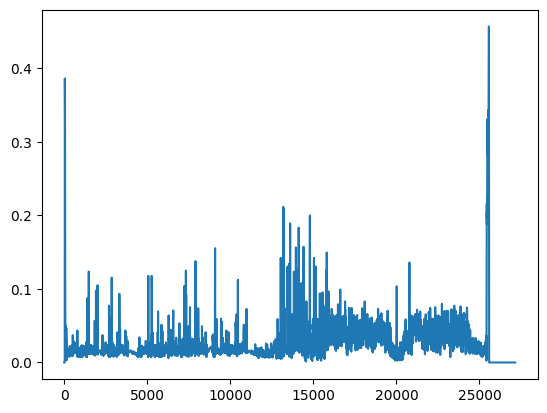

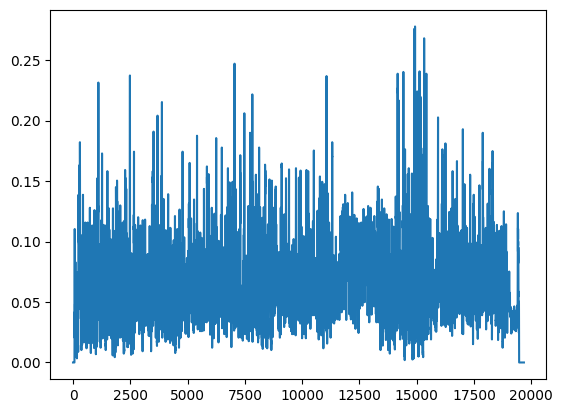

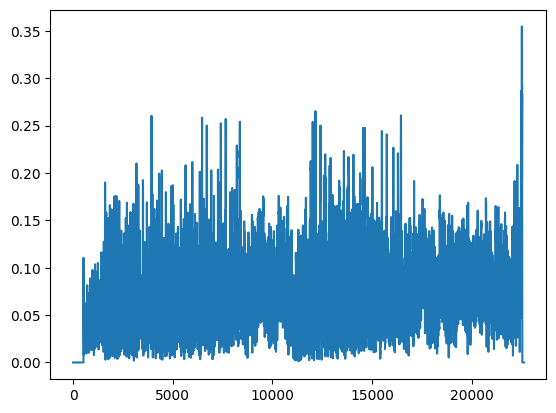

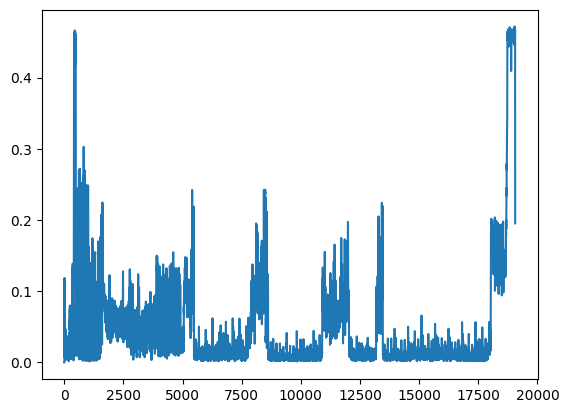

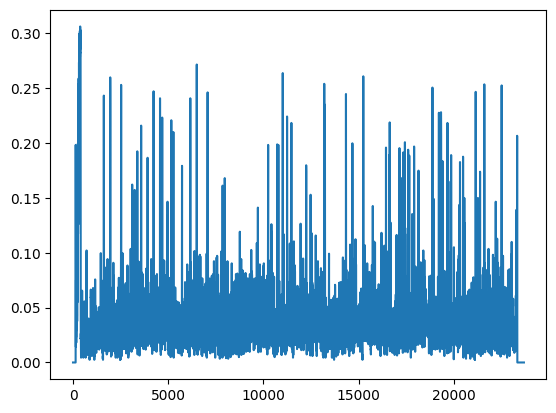

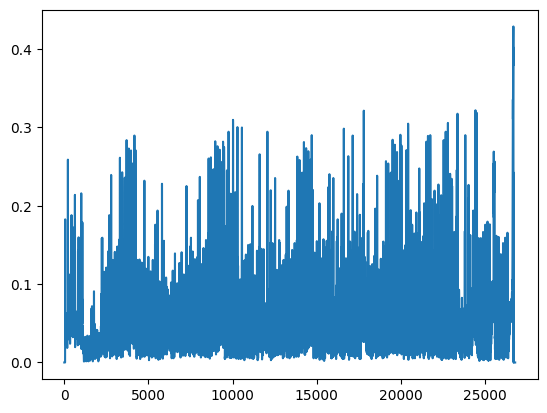

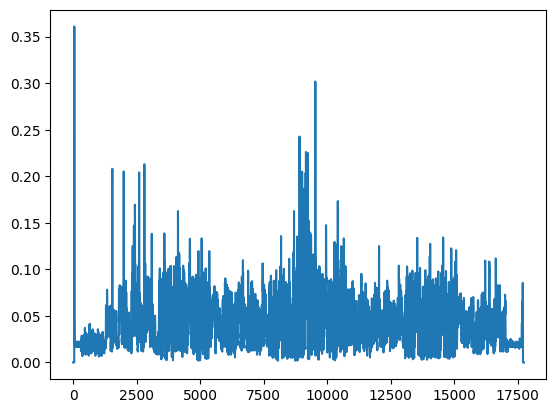

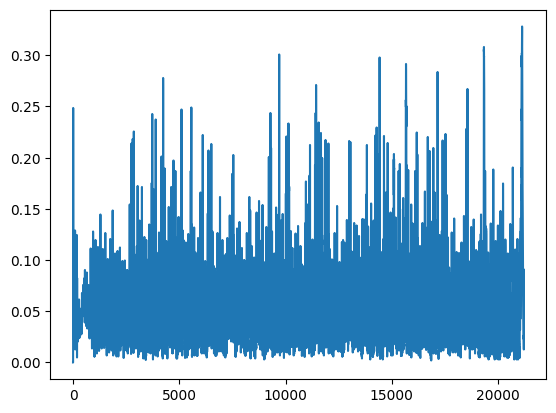

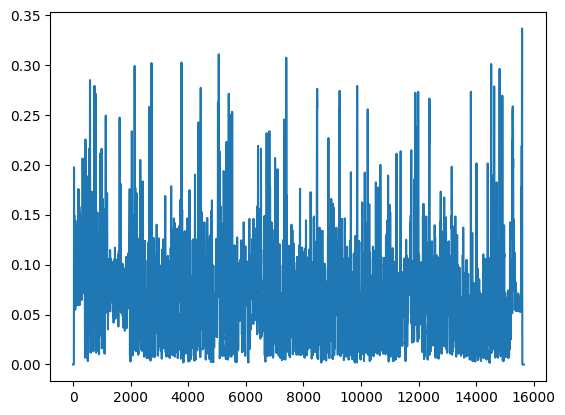

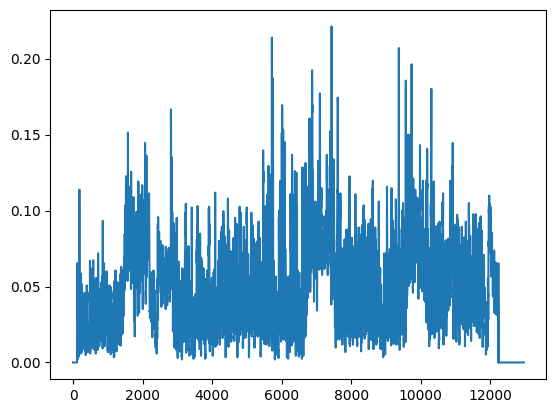

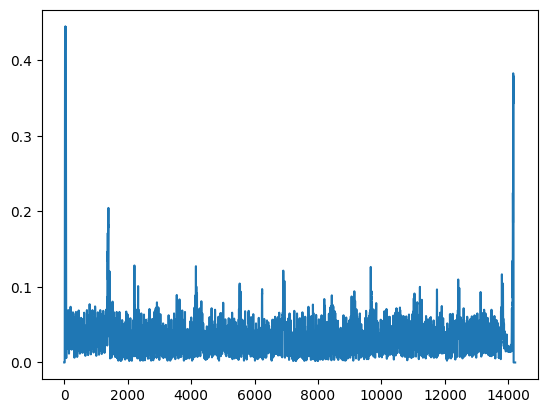

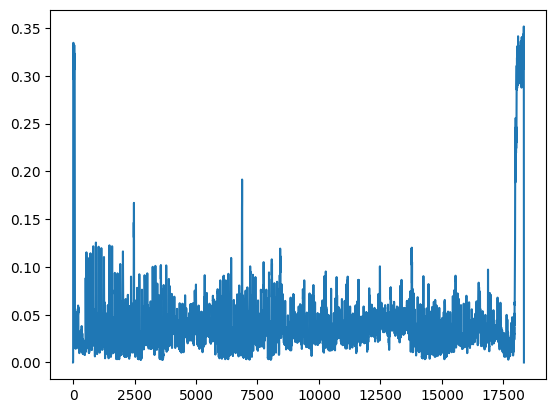

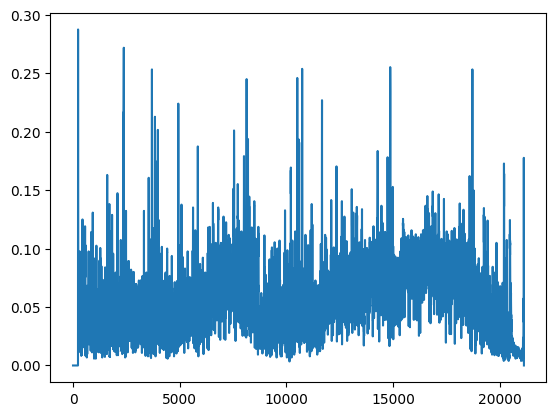

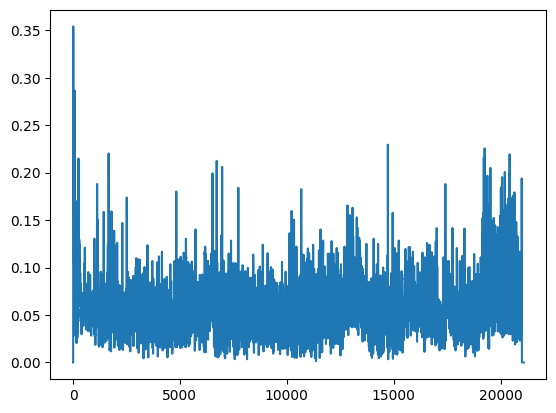

In [ ]:
#generate np arrays from wav files
files = list()
for x in range(num_samples):
    filename = f'audio{x:02}.wav'
    files.append(to_array(filename, 44100))
mels = list()

#used this to test different functions
for x in files:
    m = get_zeroes(x, True)
    mels.append(m)



In [ ]:
#create feature column using mel spectrograms
sam['Feature'] = mels
sam = sam.drop(columns=['Url_youtube'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

#tried to get spectrograms into processable format
X = np.array(sam['Feature'].tolist())
y = np.array(sam['Likes'].tolist())
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)
x_test.shape

(4, 50)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 


x_train = x_train.reshape(16, 50)
x_test = x_test.reshape(4, 50)

#Tried to create CNN to process spectrogram images, didn't have time to get it working, most of this was copied from another source
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 86, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 86, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 42, 32)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 42, 32)        

ValueError: ignored